In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# The path to our CSV file
file = "Resources/original_olympic_data.csv"

# Read our data into pandas
df = pd.read_csv(file)
df.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
#Found Column name
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [4]:
starter_olympics_df = df.loc[:, ['Name', 'Sex', 'Age', 'Team',
                                'Year', 'Sport', 'Event', 'Medal']]
starter_olympics_df.head()


,Name,Sex,Age,Team,Year,Sport,Event,Medal
0,A Dijiang,M,24.0,China,1992,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,China,2012,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,Denmark,1920,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,1900,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,Netherlands,1988,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
medals_df = df.loc[:, ['Team','Name', 'Sex', 'Year', 'Event', 'Medal']]

In [6]:
medals_winners_df= medals_df.dropna(how='any')

In [7]:
medals_winners_df.head()

,Team,Name,Sex,Year,Event,Medal
3,Denmark/Sweden,Edgar Lindenau Aabye,M,1900,Tug-Of-War Men's Tug-Of-War,Gold
37,Finland,Arvo Ossian Aaltonen,M,1920,Swimming Men's 200 metres Breaststroke,Bronze
38,Finland,Arvo Ossian Aaltonen,M,1920,Swimming Men's 400 metres Breaststroke,Bronze
40,Finland,Juhamatti Tapio Aaltonen,M,2014,Ice Hockey Men's Ice Hockey,Bronze
41,Finland,Paavo Johannes Aaltonen,M,1948,Gymnastics Men's Individual All-Around,Bronze


In [8]:
medals_winners_df

,Team,Name,Sex,Year,Event,Medal
3,Denmark/Sweden,Edgar Lindenau Aabye,M,1900,Tug-Of-War Men's Tug-Of-War,Gold
37,Finland,Arvo Ossian Aaltonen,M,1920,Swimming Men's 200 metres Breaststroke,Bronze
38,Finland,Arvo Ossian Aaltonen,M,1920,Swimming Men's 400 metres Breaststroke,Bronze
40,Finland,Juhamatti Tapio Aaltonen,M,2014,Ice Hockey Men's Ice Hockey,Bronze
41,Finland,Paavo Johannes Aaltonen,M,1948,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...
271078,Soviet Union,Galina Ivanovna Zybina (-Fyodorova),F,1956,Athletics Women's Shot Put,Silver
271080,Soviet Union,Galina Ivanovna Zybina (-Fyodorova),F,1964,Athletics Women's Shot Put,Bronze
271082,Poland,Bogusaw Zych,M,1980,"Fencing Men's Foil, Team",Bronze
271102,Russia,Olesya Nikolayevna Zykina,F,2000,Athletics Women's 4 x 400 metres Relay,Bronze


In [12]:
USmedal_winners = medals_winners_df[(medals_winners_df["Team"] == "United States")]

In [14]:
USMale_Winner = USmedal_winners.loc[USmedal_winners["Sex"] == "M",:]
USFemale_Winner = USmedal_winners.loc[USmedal_winners["Sex"] == "F",:]

In [15]:
#USMale_Winner
USFemale_Winner

,Team,Name,Sex,Year,Event,Medal
283,United States,Margaret Ives Abbott (-Dunne),F,1900,Golf Women's Individual,Gold
286,United States,Monica Cecilia Abbott,F,2008,Softball Women's Softball,Silver
311,United States,Nia Nicole Abdallah,F,2004,Taekwondo Women's Featherweight,Silver
1514,United States,Rachael Alexis Adams,F,2016,Volleyball Women's Volleyball,Bronze
2352,United States,Robyn Mokihana Ah Mow-Santos,F,2008,Volleyball Women's Volleyball,Silver
...,...,...,...,...,...,...
269641,United States,"Nicole ""Nikki"" Ziegelmeyer (-Brown, -Meyer)",F,1992,"Short Track Speed Skating Women's 3,000 metres...",Silver
269642,United States,"Nicole ""Nikki"" Ziegelmeyer (-Brown, -Meyer)",F,1994,"Short Track Speed Skating Women's 3,000 metres...",Bronze
269854,United States,Suzanne Winona Zimmerman (-Edwards),F,1948,Swimming Women's 100 metres Backstroke,Silver
270182,United States,"Kimberley Lyn ""Kim"" Zmeskal (-Burdette)",F,1992,Gymnastics Women's Team All-Around,Bronze


In [16]:
USFW = USFemale_Winner[["Year", "Medal"]]
USFW

,Year,Medal
283,1900,Gold
286,2008,Silver
311,2004,Silver
1514,2016,Bronze
2352,2008,Silver
...,...,...
269641,1992,Silver
269642,1994,Bronze
269854,1948,Silver
270182,1992,Bronze


In [17]:
labels = USFW['Year'].drop_duplicates()
print(labels.tolist())

[1900, 2008, 2004, 2016, 1992, 1996, 2012, 1952, 1956, 1964, 2000, 1984, 2014, 1988, 1960, 1972, 1976, 2002, 2010, 1968, 1998, 1948, 1924, 1928, 1994, 1936, 1920, 2006, 1932, 1904, 1980]


In [51]:
USFMC = USFW.groupby(['Year','Medal']).agg(Medal_Count=pd.NamedAgg(column="Medal",aggfunc ="count"))
USMedalBRK = USFMC.reset_index()
USBREAK = USMedalBRK.set_index('Year')
USBREAK

,Medal,Medal_Count
Year,,
1900,Bronze,2
1900,Gold,1
1900,Silver,1
1904,Bronze,2
1904,Gold,2
...,...,...
2014,Gold,4
2014,Silver,22
2016,Bronze,33


In [69]:
USFWGold = USBREAK[(USBREAK["Medal"]=="Gold")]
USFEMGOLD = USFWGold.drop(columns=["Medal"])
USFEMGOLD.reset_index()
USWOMEN_GOLDEN = USFEMGOLD["Medal_Count"]

USFWSilver = USBREAK[(USBREAK["Medal"]=="Silver")]
USFEMSILVER = USFWSilver.drop(columns=["Medal"])
USFEMSILVER.reset_index()
USWOMEN_SECOND = USFEMSILVER["Medal_Count"]

USFWBronze = USBREAK[(USBREAK["Medal"]=="Bronze")]
USFEMBRONZE = USFWBronze.drop(columns=["Medal"])
USFEMBRONZE.reset_index()
USWOMEN_THIRD = USFEMBRONZE["Medal_Count"]


c:\users\bck2l\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


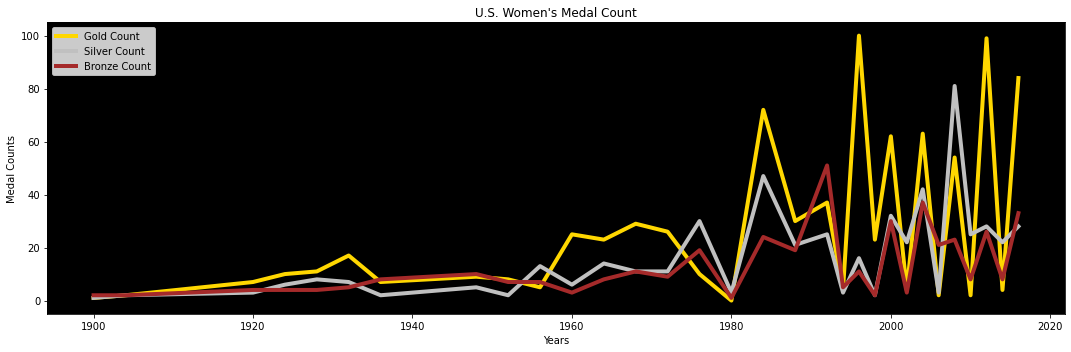

In [115]:
USWomen_Table = pd.DataFrame({"Gold Count":USWOMEN_GOLDEN,
                            "Silver Count":USWOMEN_SECOND,
                            "Bronze Count":USWOMEN_THIRD
})
Women_Us_Clean = USWomen_Table.replace(np.nan, 0)
Women_Us_Clean_2 = Women_Us_Clean.astype(int)
Women_Us_Clean_2.plot(style = {"Gold Count": 'gold', "Silver Count": 'silver', "Bronze Count":'brown'},figsize=(15,5), lw =4)
ax = plt.axes()
ax.set_facecolor("black")
plt.title("U.S. Women's Medal Count")
plt.xlabel("Years")
plt.ylabel("Medal Counts")
plt.tight_layout()